#Assignment # 1 - Generating 100 samples per distribution for a Normal,  Poisson, Binomial, Chi-Squared, Rayleigh and von Mises distributions. By Denis Khryashchev (dk2926)
##(mean = 25, minimal size = 10, maximal size = 2000)

In [1]:
# importing libraries to generate distributions
__author__= 'dk2926'
import os
import numpy as np
import pylab as plt
import scipy.stats as scpst
import matplotlib.mlab as mlab

# embedding pylab images in the document
%pylab inline

# defining the mean value for every single distribution and minimal and maximal sizes of the distributions
distribution_Mean=25
floor = 10
ceiling = 2000

# generating linear array of the sizes of the distributions (from 10 to 2000)
#size_array = np.linspace(floor, ceiling, num=100, dtype = np.int16)
#print "\nLinear equispaced sizes array \n\n", (size_array)

# generating log array of the sizes of the distributions (from 10 to 2000)
size_array = np.logspace(2.31, 7.601, num=100, base=np.exp(1), dtype = np.int16)
print "\nNon-linear, e-log spaced sizes array \n\n", (size_array)

Populating the interactive namespace from numpy and matplotlib

Non-linear, e-log spaced sizes array 

[  10   10   11   11   12   13   13   14   15   16   17   18   19   20   21
   22   23   24   26   27   29   30   32   34   36   38   40   42   44   47
   50   52   55   58   61   65   68   72   76   80   85   90   95  100  105
  111  117  124  131  138  145  153  162  171  180  190  200  211  223  235
  248  262  276  292  308  325  342  361  381  402  424  447  472  498  525
  554  585  617  651  686  724  764  806  850  897  946  998 1053 1111 1172
 1236 1304 1375 1451 1531 1615 1703 1797 1896 2000]


`%matplotlib` prevents importing * from pylab and numpy


## Generating distributions and plotting means
### mean = 25, minimal size = 10, maximal size = 2000

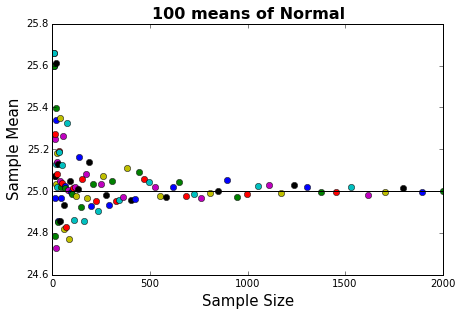

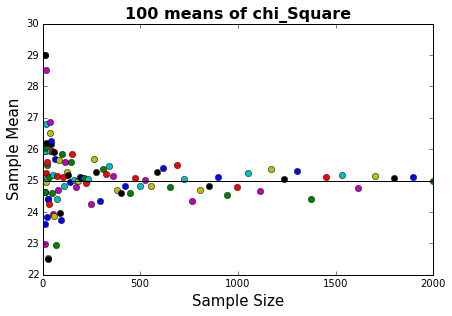

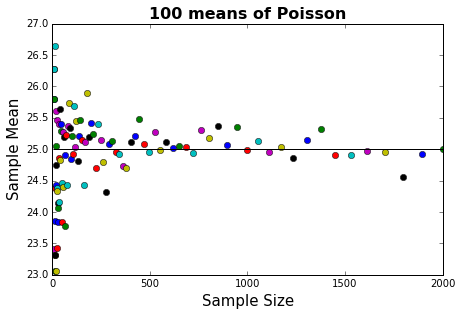

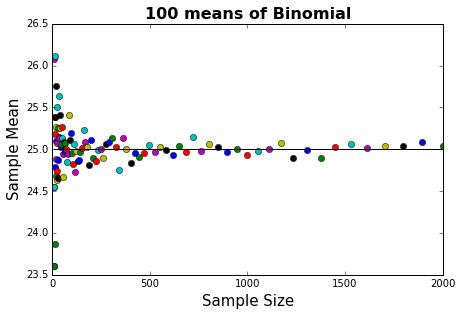

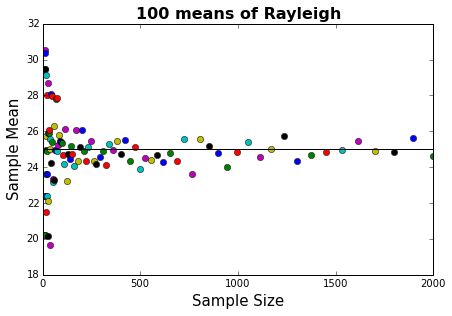

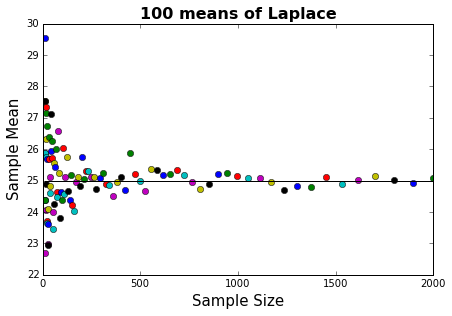

In [2]:
# creating dictionaries to store distributions and their means, and standard deviations (std)
distributions = {}
calculated_Means = {}
calculated_std = {}

def zeroing(distribution):
    distributions[distribution] = {}
    calculated_Means[distribution] = {}
    calculated_std[distribution] = {}
                         
zeroing('Normal')
zeroing('chi_Square')
zeroing('Poisson')
zeroing('Binomial')
zeroing('Rayleigh')
zeroing('Laplace')
                     
# generating distributions and calculating means, and standard deviations
# I intentionally did not create a function, so generating be done inside a single loop, not 6 separate loops
# it should work 6 times faster
for i in size_array:
    distributions['chi_Square'][i] = np.random.chisquare(distribution_Mean, size = i)
    distributions['Normal'][i] = np.random.normal(distribution_Mean, 1, i)
    distributions['Poisson'][i] = np.random.poisson(distribution_Mean, i)
    distributions['Binomial'][i] = np.random.binomial(distribution_Mean*1.2, 1/1.2, i)
    distributions['Rayleigh'][i] = np.random.rayleigh(sqrt(2/np.pi)*distribution_Mean, i)
    distributions['Laplace'][i] = np.random.laplace(distribution_Mean, 5, i)
    
    calculated_Means['chi_Square'][i] = distributions['chi_Square'][i].mean()
    calculated_Means['Normal'][i] = distributions['Normal'][i].mean()
    calculated_Means['Poisson'][i] = distributions['Poisson'][i].mean()
    calculated_Means['Binomial'][i] = distributions['Binomial'][i].mean()
    calculated_Means['Rayleigh'][i] = distributions['Rayleigh'][i].mean()
    calculated_Means['Laplace'][i] = distributions['Laplace'][i].mean()
    
    calculated_std['chi_Square'][i] = distributions['chi_Square'][i].std()
    calculated_std['Normal'][i] = distributions['Normal'][i].std()
    calculated_std['Poisson'][i] = distributions['Poisson'][i].std()
    calculated_std['Binomial'][i] = distributions['Binomial'][i].std()
    calculated_std['Rayleigh'][i] = distributions['Rayleigh'][i].std()
    calculated_std['Laplace'][i] = distributions['Laplace'][i].std()

#creating plotting function for means
def drawing(distribution):
    fig = plt.figure(figsize = (7,4.5))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Sample Size', fontsize =15)
    ax.set_ylabel('Sample Mean', fontsize = 15)
    for i in size_array:
        ax.plot(i, calculated_Means[distribution][i], 'o')
    ax.plot([min(size_array), max(size_array)],[distribution_Mean, distribution_Mean], 'k')
    ax.set_title('100 means of ' + distribution, fontsize = 16, fontweight = 'bold')
    
#plotting the means
drawing('Normal')
drawing('chi_Square')
drawing('Poisson')
drawing('Binomial')
drawing('Rayleigh')
drawing('Laplace')

## The means behave as expected. For the distributions with the smaller sample sizes the difference between the mean of the sample and the population is bigger. For the distributions with the bigger sample sizes the difference between the mean of the sample and the population is smaller. The distributions of the means of all of the various distributions tend to resemble the shape of the normal distribution, therefore practically confirming the central limit theorem.

## Plotting standard deviations

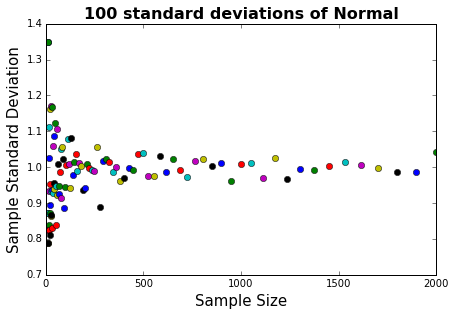

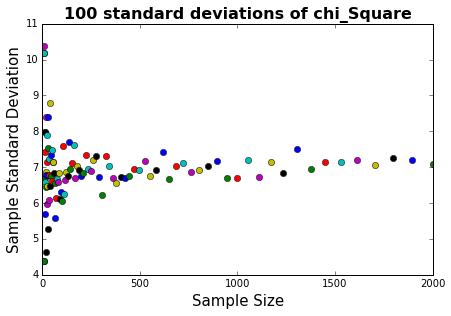

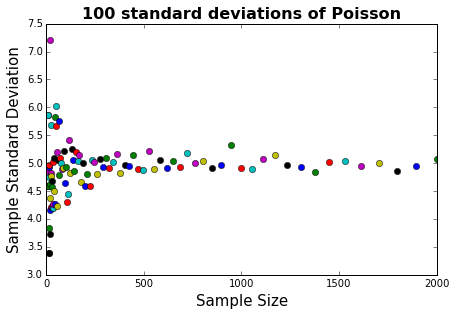

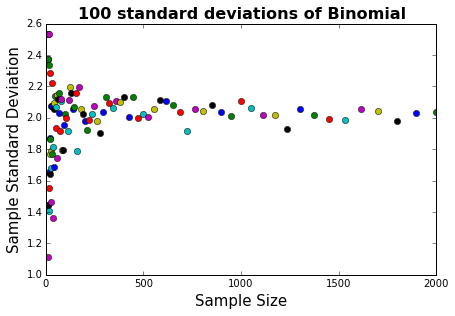

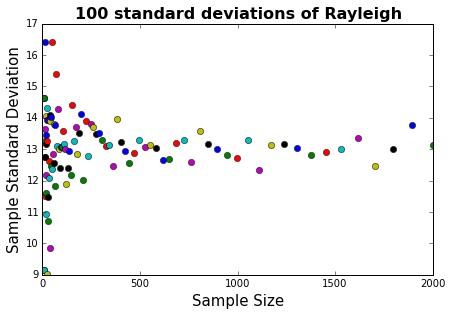

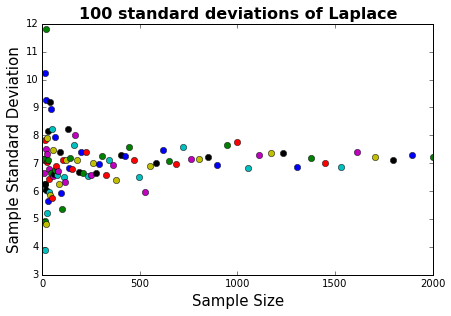

In [3]:
#creating plotting function for standards deviations
def drawing_std(distribution):
    fig = plt.figure(figsize = (7,4.5))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Sample Size', fontsize =15)
    ax.set_ylabel('Sample Standard Deviation', fontsize = 15)
    for i in size_array:
        ax.plot(i, calculated_std[distribution][i], 'o')
    ax.set_title('100 standard deviations of ' + distribution, fontsize = 16, fontweight = 'bold')
    
#plotting the means
drawing_std('Normal')
drawing_std('chi_Square')
drawing_std('Poisson')
drawing_std('Binomial')
drawing_std('Rayleigh')
drawing_std('Laplace')

## The standard deviations behave as expected. They followed the behavior of the means. For the distributions with the smaller sample sizes the difference between the standard deviation the sample and the population is bigger. For the distributions with the bigger sample sizes the difference between the standard deviation of the sample and the population is smaller. The distributions of the standard deviations of all of the various distributions tend to resemble the shape of the normal distribution, therefore practically confirming the central limit theorem.

# PLotting histograms for sample means 

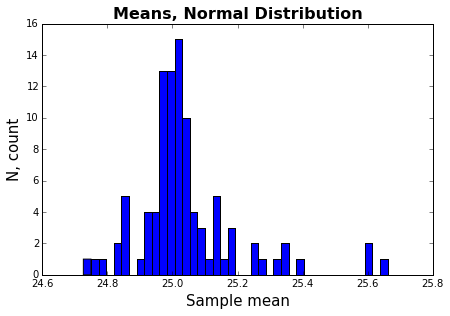

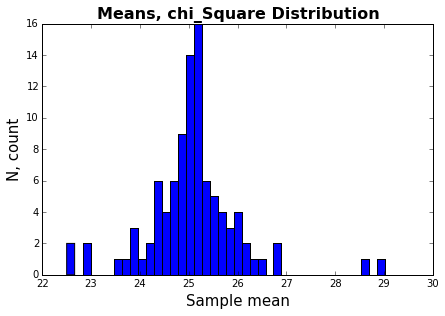

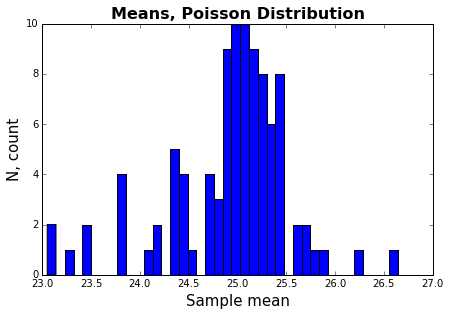

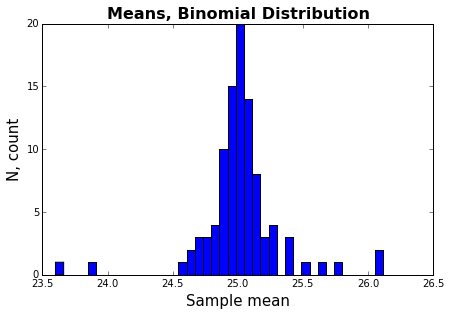

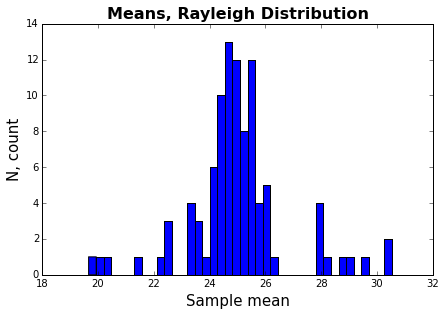

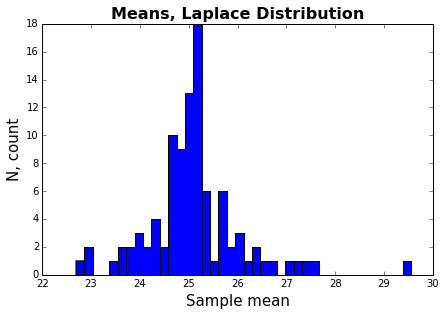

In [4]:
# joining the means and standard deviations together to plot them on a histogram
# storing means and stds in means and stds 
means = {}
stds = {}
def zeroing2(distribution):
        means[distribution] = []
        stds[distribution] = []

zeroing2('Normal')
zeroing2('chi_Square')
zeroing2('Poisson')
zeroing2('Binomial')
zeroing2('Rayleigh')
zeroing2('Laplace')

# appending mean and std values of each distribution to means and stds 
def joiner(distribution):
    for j in calculated_Means[distribution]:
        means[distribution].append(calculated_Means[distribution][j])
    for j in calculated_std[distribution]:
        stds[distribution].append(calculated_std[distribution][j])

joiner('Normal')
joiner('chi_Square')
joiner('Poisson')
joiner('Binomial')
joiner('Rayleigh')
joiner('Laplace')

# plotting of the means histograms function + normal distribution fitting
def draw_hist(distribution):
    fig = plt.figure(figsize = (7, 4.5))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Sample mean', fontsize=15)
    ax.set_ylabel('N, count', fontsize=15)
    ax.hist(means[distribution], bins=40)
    ax.set_title('Means, '+distribution+' Distribution', fontsize=16, fontweight='bold')
    
# plotting the histograms of the distributions of the means
draw_hist('Normal')
draw_hist('chi_Square')
draw_hist('Poisson')
draw_hist('Binomial')
draw_hist('Rayleigh')
draw_hist('Laplace')


## Plotting Standard deviation histograms

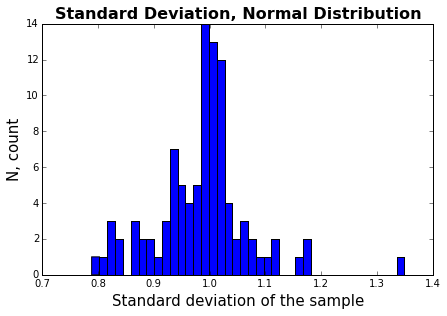

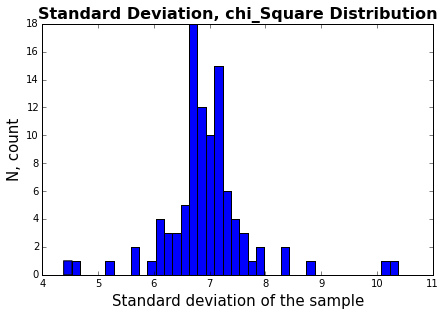

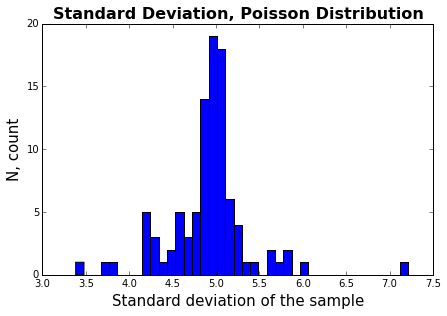

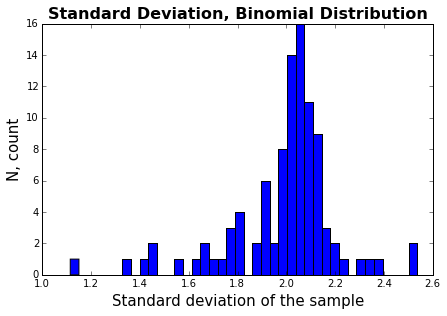

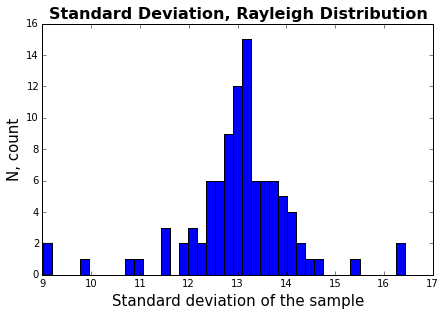

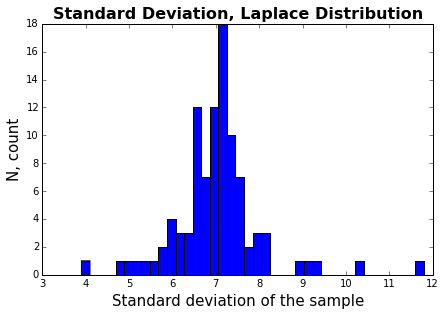

In [5]:
# plotting of the stds histograms function
def draw_hist_std(distribution):
    fig = plt.figure(figsize = (7, 4.5))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Standard deviation of the sample', fontsize=15)
    ax.set_ylabel('N, count', fontsize=15)
    ax.hist(stds[distribution], bins=40)
    ax.set_title('Standard Deviation, '+distribution+' Distribution', fontsize=16, fontweight='bold')
    
draw_hist_std('Normal')
draw_hist_std('chi_Square')
draw_hist_std('Poisson')
draw_hist_std('Binomial')
draw_hist_std('Rayleigh')
draw_hist_std('Laplace')

#Gaussian fitting

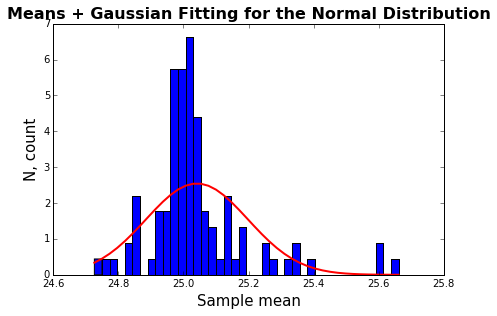

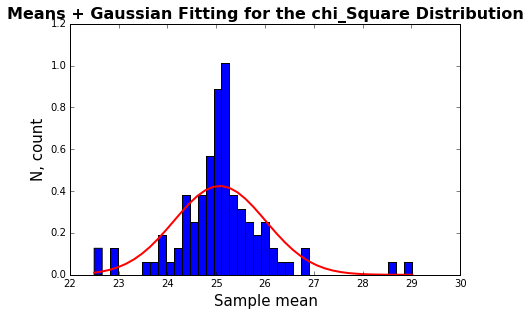

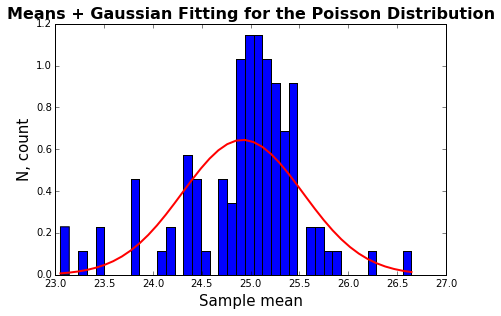

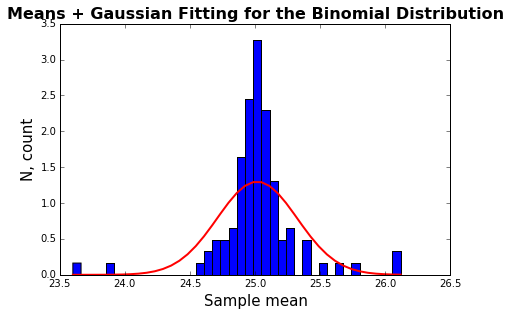

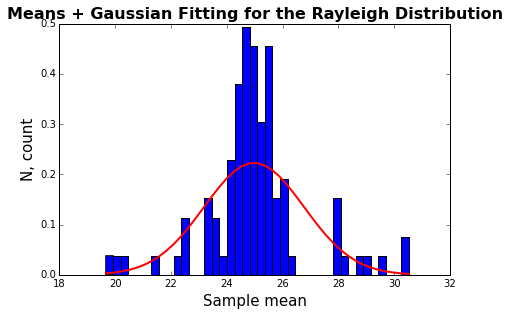

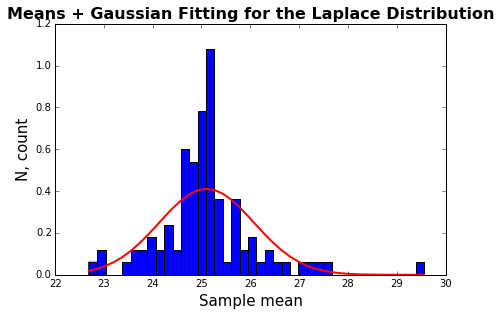

In [6]:
# modifying draw hist function 
def draw_histF(distribution):
    fig = plt.figure(figsize = (7, 4.5))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Sample mean', fontsize=15)
    ax.set_ylabel('N, count', fontsize=15)
    ax.set_title('Means + Gaussian Fitting for the '+distribution+' Distribution', fontsize=16, fontweight='bold')
    (mu, sigma) = scpst.norm.fit(means[distribution])
    n, bins, patches = plt.hist(means[distribution], 40, normed=1)
    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, 'r-', linewidth=2)

# plotting the histograms of the distributions of the means + normal distribution fitting
draw_histF('Normal')
draw_histF('chi_Square')
draw_histF('Poisson')
draw_histF('Binomial')
draw_histF('Rayleigh')
draw_histF('Laplace')
